In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
from IPython.display import Image
from yt.units import G
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve_fft, Gaussian2DKernel

%matplotlib inline

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ds1 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_selfshield_z15/DD0600/DD0600')
ds2 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_nref10f_selfshield_z6/DD0600/DD0600')

ad1 = ds1.all_data()
ad2 = ds2.all_data()

yt : [INFO     ] 2018-11-16 14:34:44,104 Parameters: current_time              = 183.066527818
yt : [INFO     ] 2018-11-16 14:34:44,106 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-16 14:34:44,108 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-16 14:34:44,110 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-16 14:34:44,112 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-11-16 14:34:44,113 Parameters: current_redshift          = 1.67203863787
yt : [INFO     ] 2018-11-16 14:34:44,115 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-11-16 14:34:44,116 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-11-16 14:34:44,118 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-11-16 14:34:44,148 Parameters: current_time              = 183.066527818
yt : [INFO     ] 2018-11-16 14:34:44,149 Parameters: domain_dimensions         = [256 256 25

In [3]:
galprops_nref11n = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_selfshield_z15_galprops.npy')[()]
galprops_nref10f = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_selfshield_z6_galprops.npy')[()]


In [6]:
anchor_xs_box_avg1, anchor_ys_box_avg1, anchor_zs_box_avg1, anchor_vxs_box_avg1, anchor_vys_box_avg1, anchor_vzs_box_avg1, anchor_xs_avg1, anchor_ys_avg1, anchor_zs_avg1, anchor_vxs_avg1, anchor_vys_avg1, anchor_vzs_avg1 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/anchor_files/nref11n_selfshield_z15_DD0600_cen.npy')[()]
anchor_xs_box_avg2, anchor_ys_box_avg2, anchor_zs_box_avg2, anchor_vxs_box_avg2, anchor_vys_box_avg2, anchor_vzs_box_avg2, anchor_xs_avg2, anchor_ys_avg2, anchor_zs_avg2, anchor_vxs_avg2, anchor_vys_avg2, anchor_vzs_avg2 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/anchor_files/nref11n_nref10f_selfshield_z6_DD0600_cen.npy')[()]

In [20]:
xcen1 = anchor_xs_box_avg1 - anchor_xs_avg1
ycen1 = anchor_ys_box_avg1 - anchor_ys_avg1
zcen1 = anchor_zs_box_avg1 - anchor_zs_avg1


xcen2 = anchor_xs_box_avg2 - anchor_xs_avg2
ycen2 = anchor_ys_box_avg2 - anchor_ys_avg2
zcen2 = anchor_zs_box_avg2 - anchor_zs_avg2

cen1 = yt.YTArray([xcen1, ycen1, zcen1], 'kpc')
cen2 = yt.YTArray([xcen2, ycen2, zcen2], 'kpc')

In [17]:
slc1 = yt.SlicePlot(ds1, 'z', 'density', center=yt.YTArray(cen1), width=(20,'kpc'))
slc2 = yt.SlicePlot(ds2, 'z', 'density', center=yt.YTArray(cen2), width=(20,'kpc'))





slc1.save('nref10n.png')
slc2.save('nref10f.png')

yt : [INFO     ] 2018-11-16 14:47:05,200 xlim = 26570.527709 26590.527709
yt : [INFO     ] 2018-11-16 14:47:05,201 ylim = 26233.472501 26253.472501
yt : [INFO     ] 2018-11-16 14:47:05,203 xlim = 0.493432 0.493804
yt : [INFO     ] 2018-11-16 14:47:05,205 ylim = 0.487173 0.487545
yt : [INFO     ] 2018-11-16 14:47:05,207 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-11-16 14:47:06,347 xlim = 26570.404280 26590.404280
yt : [INFO     ] 2018-11-16 14:47:06,348 ylim = 26232.839319 26252.839319
yt : [INFO     ] 2018-11-16 14:47:06,351 xlim = 0.493430 0.493802
yt : [INFO     ] 2018-11-16 14:47:06,352 ylim = 0.487161 0.487533
yt : [INFO     ] 2018-11-16 14:47:06,354 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-11-16 14:47:07,159 Saving plot nref10n.png
yt : [INFO     ] 2018-11-16 14:47:07,761 Saving plot nref10f.png


['nref10f.png']

In [18]:
def _stars(pfilter, data):
    return data[(pfilter.filtered_type, "particle_type")] == 2

#this gets dark matter particles in zoom region only
def _darkmatter(pfilter, data):
    return data[(pfilter.filtered_type, "particle_type")] == 4

yt.add_particle_filter("stars",function=_stars, filtered_type='all',requires=["particle_type"])
yt.add_particle_filter("darkmatter",function=_darkmatter, filtered_type='all',requires=["particle_type"])


In [19]:
ds1.add_particle_filter('stars')
ds1.add_particle_filter('darkmatter')

ds2.add_particle_filter('stars')
ds2.add_particle_filter('darkmatter')








True

In [92]:
cen = [cen1, cen2]
rmn = -0.988
rmx = 1.#2.5

rmn = 0.11
rmn1 = 3
rmn2 = 10
rmx = 150

nr0 = 30
nr1 = 20
nr2 = 10



xarr0 = np.linspace(rmn, rmn1, nr0)
xarr1 = np.linspace(rmn1, rmn2, nr1)
xarr2 = np.linspace(rmn2, rmx, nr2)



xarr = np.concatenate((xarr0, xarr1, xarr2))


masses = zeros((2, len(xarr), 3))

for d_i, ds in enumerate([ds1, ds2]):
    for r_i, ro in enumerate(xarr):
        print ro
        ro = ds.arr(ro, 'kpc')
        v_sphere = ds.sphere(cen[d_i], ro)

        dark_mass   = v_sphere[('darkmatter', 'particle_mass')].in_units('Msun').sum()
        star_mass   = v_sphere[('stars', 'particle_mass')].in_units('Msun').sum()
        gas_mass    = v_sphere[('gas', 'cell_mass')].in_units('Msun').sum()
        print '%.2f  %.2f  %.2f' %(log10(dark_mass), log10(star_mass), log10(gas_mass))
        
        masses[d_i, r_i, 0] = dark_mass
        masses[d_i, r_i, 1] = star_mass
        masses[d_i, r_i, 2] = gas_mass


0.11
8.29  9.34  6.64
0.2096551724137931
8.78  9.86  7.30
0.30931034482758624
8.97  10.05  7.69
0.4089655172413793
9.07  10.14  7.99
0.5086206896551725
9.16  10.18  8.24
0.6082758620689656
9.21  10.20  8.44
0.7079310344827586
9.28  10.21  8.60
0.8075862068965518
9.34  10.22  8.74
0.9072413793103449
9.39  10.22  8.85
1.006896551724138
9.44  10.23  8.92
1.1065517241379312
9.49  10.24  8.99
1.2062068965517243
9.53  10.24  9.05
1.3058620689655174
9.57  10.25  9.09
1.4055172413793104
9.60  10.25  9.12
1.5051724137931037
9.64  10.25  9.15
1.6048275862068968
9.67  10.26  9.17
1.7044827586206899
9.70  10.26  9.19
1.804137931034483
9.73  10.26  9.21
1.903793103448276
9.75  10.27  9.22
2.0034482758620693
9.78  10.27  9.24
2.103103448275862
9.80  10.27  9.25
2.202758620689655
9.82  10.27  9.26
2.3024137931034483
9.84  10.27  9.26
2.4020689655172416
9.86  10.28  9.27
2.5017241379310344
9.88  10.28  9.28
2.6013793103448277
9.90  10.28  9.29
2.7010344827586206
9.92  10.28  9.30
2.800689655172414
9.9

0.3200843340590308 0.3752313782080613


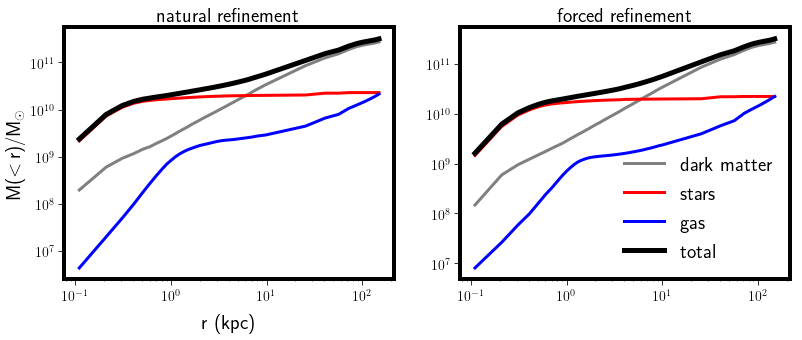

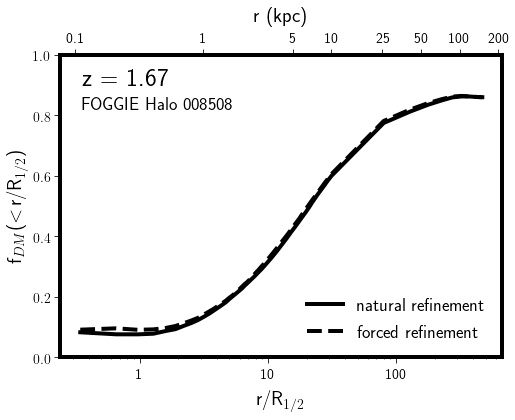

In [214]:
mpl.rcParams['axes.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6

fig, axes = plt.subplots(1,2, figsize = (13,5))



dmass0 =  masses[0, :, 0]
smass0 =  masses[0, :, 1]
gmass0 =  masses[0, :, 2]

dmass1 =  masses[1, :, 0]
smass1 =  masses[1, :, 1]
gmass1 =  masses[1, :, 2]



bmass0 = smass0 + gmass0
tmass0 = bmass0 + dmass0

bmass1 = smass1 + gmass1
tmass1 = bmass1 + dmass1


from scipy.interpolate import interp1d


int0 = interp1d(smass0, xarr)
int1 = interp1d(smass1, xarr)
re0 = int0(smass0.max()/2.)
re1 = int1(smass1.max()/2.)


print re0, re1




axes[0].plot(xarr, dmass0, linewidth = 3, linestyle = '-', color = 'grey',  label = 'dark matter')
axes[0].plot(xarr, smass0, linewidth = 3, linestyle = '-', color = 'red',  label = 'stars')
axes[0].plot(xarr, gmass0, linewidth = 3, linestyle = '-', color = 'blue',  label = 'gas')
axes[0].plot(xarr, tmass0, linewidth = 5, linestyle = '-', color = 'black', label = 'total')

axes[1].plot(xarr, dmass1, linewidth = 3, linestyle = '-', color = 'grey',  label = 'dark matter')
axes[1].plot(xarr, smass1, linewidth = 3, linestyle = '-', color = 'red',  label = 'stars')
axes[1].plot(xarr, gmass1, linewidth = 3, linestyle = '-', color = 'blue',  label = 'gas')
axes[1].plot(xarr, tmass1, linewidth = 5, linestyle = '-', color = 'black', label = 'total')



for ax in axes:
    ax.set_yscale('log')
    ax.set_xscale('log')

axes[1].legend(frameon = False, loc = 4, fontsize = 20)

axes[0].set_title('natural refinement', fontsize = 20)
axes[1].set_title('forced refinement', fontsize = 20)


axes[0].set_xlabel('r (kpc)', fontsize = 20, labelpad = 10)
axes[0].set_ylabel('M($<\,$r)/M$_{\odot}$', fontsize = 20)



#ax.set_xlim(0, 50)
fig.subplots_adjust(bottom = 0.2, top = 0.90)
fig.savefig('massprofiles_DD600.png')


fig, ax = plt.subplots(1,1, figsize = (7.4,6))

ax.plot(xarr/re0, dmass0/tmass0, linestyle = '-',  color = 'black', linewidth = 4, label = 'natural refinement')
ax.plot(xarr/re0, dmass1/tmass1, linestyle = '--', color = 'black', linewidth = 4, label = 'forced refinement')


ax.annotate('z = 1.67', (0.05, 0.9), xycoords = 'axes fraction', fontsize = 25, fontweight = 'bold')
ax.annotate('FOGGIE Halo 008508', (0.05, 0.82), xycoords = 'axes fraction', fontsize = 18, fontweight = 'bold')





ax.set_yscale('linear')
ax.set_xscale('log')

ax.set_ylim(0,1)


ax.set_xticks([1, 10, 100])
ax.set_xticklabels(['1', '10', '100'])



ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale('log')


xtcks_kpc = [0.1, 1, 5, 10, 25, 50, 100, 200]


xtcks_kpc_str = ['0.1', '1', '5', '10', '25', '50', '100', '200']


xtcks_rrd = array([x/re0 for x in xtcks_kpc])
ax2.set_xticks(xtcks_rrd)

ax2.set_xticklabels(xtcks_kpc_str)










#ax.set_xlim(0, 50)

ax.legend(frameon = False, loc = 4, fontsize = 18)
ax.set_xlabel('r/R$_{1/2}$', fontsize = 20, labelpad = 10)
ax2.set_xlabel('r (kpc)', fontsize = 20, labelpad = 10)
ax.set_ylabel('f$_{DM}$($<\,$r/R$_{1/2}$)', fontsize = 20)


fig.subplots_adjust(top = 0.85, bottom = 0.15, right = 0.95, left = 0.12)
fig.savefig('DMfraction_DD600.png', dpi = 300)


















In [109]:
print log10(smass1.max()/2.)
print log10(smass0.max()/2.)




10.044939453030626
10.059094428052111


array(0.32008433)

In [175]:
re0

array(0.32008433)

In [197]:
ds.sphere?